In [1]:
# Wow wat een goed model! Wat is er mis mee?
# H0 het model is gewoon zo goed, want ja ik heb t gemaakt he...

# H1 Overfitting
# H2 Fout in het model
# H3 Fout in de data(sets)
# H4 ???

In [2]:

%load_ext tensorboard

In [3]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import scipy as sp
import tensorflow as tf
import tensorflow.keras as keras
import zipfile
from tensorflow.keras import models
from tensorflow.keras import layers
import datetime

In [4]:
data_dir = '../projects/apple_disease_classification/data/Train'

import tensorflow as tf

img_height = 360
img_width = 360
batch_size = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 306 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 382 files belonging to 4 classes.
Using 76 files for validation.


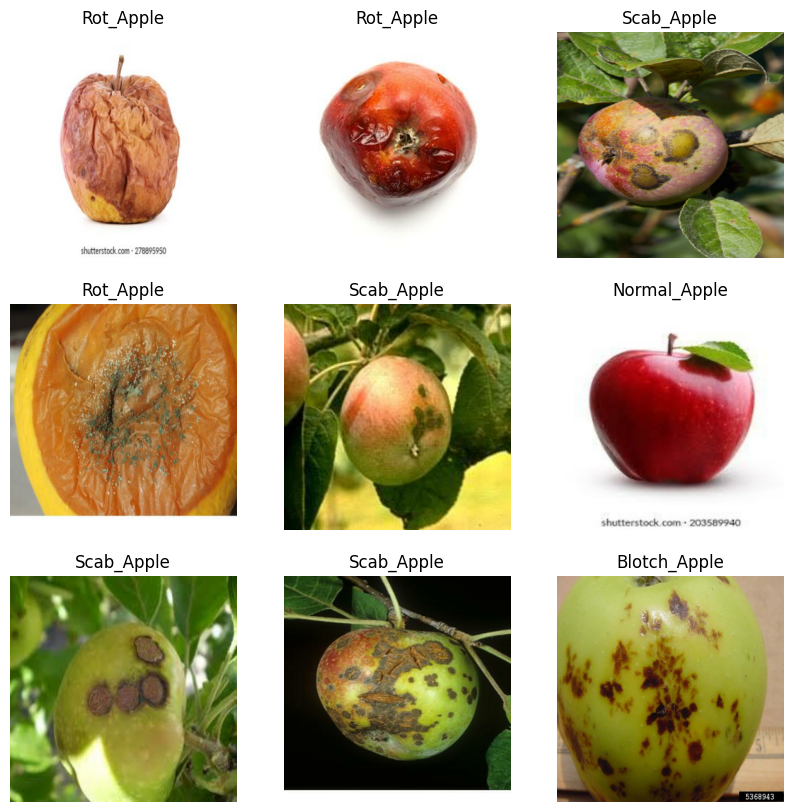

In [7]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

In [8]:
# def inspectData():
    
#     plt.figure(figsize=(10,10))
    
#     for i in range(16):
#         plt.subplot(4, 4, i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(imageObjects[i])
#         plt.xlabel(labelNames[labelNumbers[i]]) 

#     plt.show()   

In [9]:
# inspectData() 

In [10]:
num_classes = len(train_ds.class_names)

model = tf.keras.models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(360, 360, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 360, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 180, 32)     0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                        

In [11]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 10

In [12]:
log_dir = "logs/log" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [13]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(train_ds, epochs=nrOfEpochs, batch_size=32, verbose=2,callbacks=[tensorboard_callback])

Epoch 1/10
10/10 - 22s - loss: 409.6366 - accuracy: 0.2941 - 22s/epoch - 2s/step
Epoch 2/10
10/10 - 19s - loss: 4.1687 - accuracy: 0.3235 - 19s/epoch - 2s/step
Epoch 3/10
10/10 - 19s - loss: 1.1302 - accuracy: 0.5752 - 19s/epoch - 2s/step
Epoch 4/10
10/10 - 19s - loss: 0.7867 - accuracy: 0.7222 - 19s/epoch - 2s/step
Epoch 5/10
10/10 - 21s - loss: 0.4347 - accuracy: 0.8464 - 21s/epoch - 2s/step
Epoch 6/10
10/10 - 21s - loss: 0.3175 - accuracy: 0.9020 - 21s/epoch - 2s/step
Epoch 7/10
10/10 - 17s - loss: 0.2527 - accuracy: 0.9118 - 17s/epoch - 2s/step
Epoch 8/10
10/10 - 17s - loss: 0.1511 - accuracy: 0.9379 - 17s/epoch - 2s/step
Epoch 9/10
10/10 - 17s - loss: 0.1704 - accuracy: 0.9542 - 17s/epoch - 2s/step
Epoch 10/10
10/10 - 17s - loss: 0.2351 - accuracy: 0.9641 - 17s/epoch - 2s/step


In [22]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history_test = model.fit(val_ds, epochs=nrOfEpochs, batch_size=32, verbose=2,callbacks=[tensorboard_callback])

Epoch 1/10
3/3 - 5s - loss: 0.0264 - accuracy: 0.9868 - 5s/epoch - 2s/step
Epoch 2/10
3/3 - 5s - loss: 0.0215 - accuracy: 0.9868 - 5s/epoch - 2s/step
Epoch 3/10
3/3 - 5s - loss: 0.0155 - accuracy: 0.9868 - 5s/epoch - 2s/step
Epoch 4/10
3/3 - 5s - loss: 0.0108 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 5/10
3/3 - 5s - loss: 0.0073 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 6/10
3/3 - 5s - loss: 0.0048 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 7/10
3/3 - 5s - loss: 0.0036 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 8/10
3/3 - 5s - loss: 0.0029 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 9/10
3/3 - 5s - loss: 0.0023 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 10/10
3/3 - 5s - loss: 0.0018 - accuracy: 1.0000 - 5s/epoch - 2s/step


In [15]:
print(history.history.keys())
print(history_test.history.keys())

dict_keys(['loss', 'accuracy'])
dict_keys(['loss', 'accuracy'])


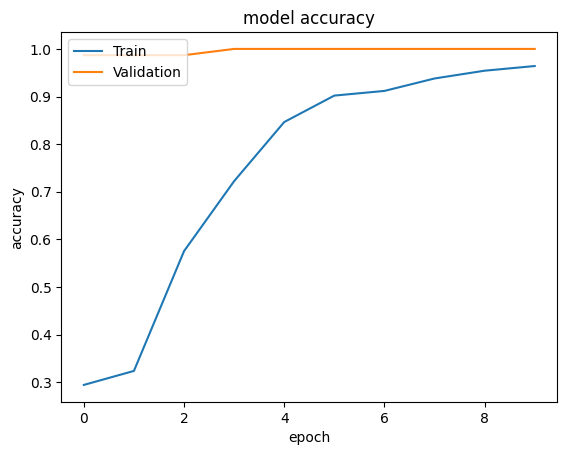

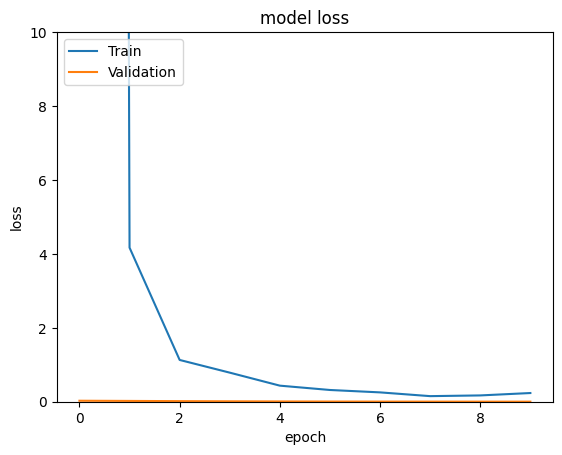

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history_test.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history_test.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0,10)
plt.show()

dict_keys(['loss', 'accuracy'])


In [17]:
%tensorboard --logdir logs/log

In [18]:
'!kill 1464'

'!kill 1464'

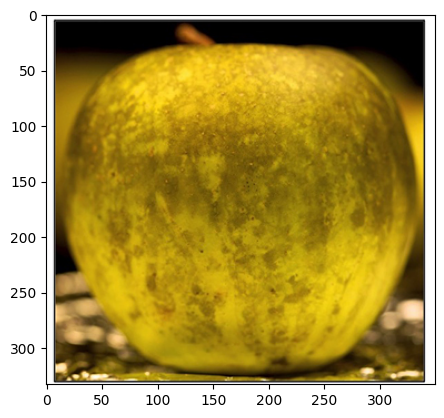

In [19]:
img = Image.open('C:/Users/Anton/MakeAIWork2/projects/apple_disease_classification/data/Use/30.jpg')


#laat plaatje zien
plt.imshow(img)

#iets met predict doen

In [20]:
img_array = tf.keras.utils.img_to_array(np.resize(img,(360,360,3)))
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Blotch_Apple with a 100.00 percent confidence.


In [21]:
#get predictions
pred = model.predict(val_ds, batch_size=32)
pred = np.argmax(pred, axis=-1)

#original labels

from sklearn.metrics import classification_report
print(classification_report(labels, pred))

ValueError: Found input variables with inconsistent numbers of samples: [32, 76]

KeyError: 'val_accuracy'

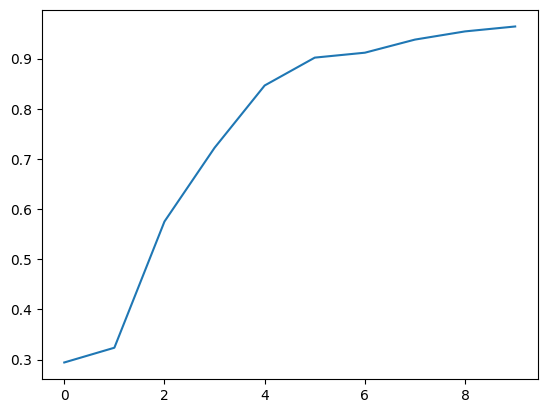

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()